In [1]:
import netCDF4 as nc
from matplotlib import pyplot as plt
import numpy as np
import glob
import pickle
from salishsea_tools import evaltools as et, places
import datetime as dt
import os
import re
import cmocean
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import matplotlib as mpl
mpl.rc('xtick', labelsize=8)
mpl.rc('ytick', labelsize=8)
mpl.rc('legend', fontsize=8)
mpl.rc('axes', titlesize=8)
mpl.rc('axes', labelsize=8)
mpl.rc('figure', titlesize=8)
mpl.rc('font', size=8)
mpl.rc('text', usetex=True)
mpl.rc('text.latex', preamble = r'''
 \usepackage{txfonts}
 \usepackage{lmodern}
 ''')
mpl.rc('font', family='sans-serif', weight='normal', style='normal')
%matplotlib inline

In [2]:
with nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/mesh_mask201702_noLPE.nc') as mesh:
    tmask=mesh.variables['tmask'][0,:,:,:]
    e1t=np.expand_dims(mesh.variables['e1t'][:,:,:],1)
    e2t=np.expand_dims(mesh.variables['e2t'][:,:,:],1)
    zs=mesh.variables['gdept_1d'][0,:]
SOGtmaskPath='/ocean/eolson/MEOPAR/northernNO3PaperCalcs/save/SOGtmask.pkl'
(tmaskSOG,_,_,_,_)=pickle.load(open(SOGtmaskPath,'rb'))

In [3]:
np.shape(tmaskSOG)

(1, 40, 898, 398)

In [4]:
idir0='/data/sallen/results/MEOPAR/new201905/'
idir1='/data/sallen/results/MEOPAR/202007/'
ts=dt.datetime(2015,2,1)
te=dt.datetime(2015,2,28)
plist=['Sentry Shoal','S3','Central node','Central SJDF']
ivars=['nitrate','diatoms','flagellates','ciliates']

In [5]:
#flist0=et.index_model_files_flex(idir0,'ptrc_T','1d','nowcast',ts,te)
flist0=et.index_model_files(ts,te,idir0,'long',1,'ptrc_T',24)

In [6]:
flist1=et.index_model_files(ts,te,idir1,'long',1,'ptrc_T',24)

In [7]:
len(flist0)

28

In [8]:
ts0=dict()
for pl in plist:
    ts0[pl]=dict()
    for ivar in ivars:
        ts0[pl][ivar]=list()
ts0['SOGMean']=dict()
ts0['SOGSTE']=dict()
for ivar in ivars:
    ts0['SOGMean'][ivar]=list()
    ts0['SOGSTE'][ivar]=list()
for i,r in flist0.iterrows():
    with nc.Dataset(r['paths']) as f:
        tmaskSOG2=tmaskSOG*np.ones(np.shape(f.variables['nitrate'][:])) # broadcast
        for pl in plist:
            jj,ii=places.PLACES[pl]['NEMO grid ji']
            for ivar in ivars:
                ts0[pl][ivar].append(f.variables[ivar][:,:,jj,ii])
        for ivar in ivars:
            ts0['SOGMean'][ivar].append(np.mean(np.ma.masked_where(tmaskSOG2==0,
                                                                   f.variables[ivar][:,:,:,:]),tuple((2,3))))
            ts0['SOGSTE'][ivar].append(np.std(np.ma.masked_where(tmaskSOG2==0,f.variables[ivar][:,:,:,:]),tuple((2,3)))/\
                                np.sqrt(np.sum(tmaskSOG2,tuple((2,3)))))

In [9]:
for pl in plist:
    for ivar in ivars:
        ts0[pl][ivar]=np.concatenate(ts0[pl][ivar],axis=0)
for ivar in ivars:
    ts0['SOGMean'][ivar]=np.concatenate(ts0['SOGMean'][ivar],axis=0)
    ts0['SOGSTE'][ivar]=np.concatenate(ts0['SOGSTE'][ivar],axis=0)

In [10]:
dates0=np.array([ts+dt.timedelta(days=ii) for ii in range(0,len(ts0['S3']['nitrate']))])

In [11]:
ts1=dict()
for pl in plist:
    ts1[pl]=dict()
    for ivar in ivars:
        ts1[pl][ivar]=list()
ts1['SOGMean']=dict()
ts1['SOGSTE']=dict()
for ivar in ivars:
    ts1['SOGMean'][ivar]=list()
    ts1['SOGSTE'][ivar]=list()
for i,r in flist1.iterrows():
    with nc.Dataset(r['paths']) as f:
        tmaskSOG2=tmaskSOG*np.ones(np.shape(f.variables['nitrate'][:])) # broadcast
        for pl in plist:
            jj,ii=places.PLACES[pl]['NEMO grid ji']
            for ivar in ivars:
                ts1[pl][ivar].append(f.variables[ivar][:,:,jj,ii])
        for ivar in ivars:
            ts1['SOGMean'][ivar].append(np.mean(np.ma.masked_where(tmaskSOG2==0,
                                                                   f.variables[ivar][:,:,:,:]),tuple((2,3))))
            ts1['SOGSTE'][ivar].append(np.std(np.ma.masked_where(tmaskSOG2==0,f.variables[ivar][:,:,:,:]),tuple((2,3)))/\
                                np.sqrt(np.sum(tmaskSOG2,tuple((2,3)))))

In [12]:
for pl in plist:
    for ivar in ivars:
        ts1[pl][ivar]=np.concatenate(ts1[pl][ivar],axis=0)
for ivar in ivars:
    ts1['SOGMean'][ivar]=np.concatenate(ts1['SOGMean'][ivar],axis=0)
    ts1['SOGSTE'][ivar]=np.concatenate(ts1['SOGSTE'][ivar],axis=0)

In [13]:
np.shape(ts1['SOGMean']['nitrate'])

(28, 40)

In [14]:
dates1=np.array([ts+dt.timedelta(days=ii) for ii in range(0,len(ts1['S3']['nitrate'][:,0]))])

In [15]:
np.shape(ts0['S3']['nitrate']),np.shape(ts1['S3']['nitrate'])

((28, 40), (28, 40))

In [16]:
zs[0],zs[10],zs[26]

(0.5000002726327963, 10.504765304051489, 98.06295924154529)

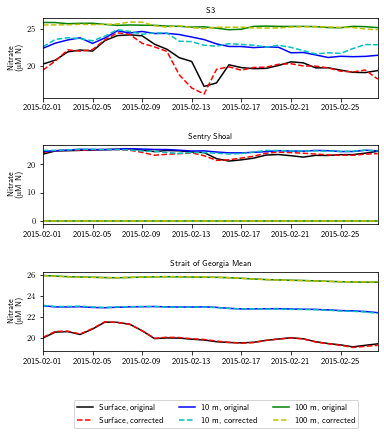

In [20]:
fig,ax=plt.subplots(3,1,figsize=(6,6))
fig.subplots_adjust(hspace=.6,bottom = 0.18,top=.95)
p1,=ax[0].plot(dates0,ts0['S3']['nitrate'][:,0],'k-',label='_nolegend_')
p2,=ax[0].plot(dates1,ts1['S3']['nitrate'][:,0],'r--',label='_nolegend_')
p3,=ax[0].plot(dates0,ts0['S3']['nitrate'][:,10],'b-',label='_nolegend_')
p4,=ax[0].plot(dates1,ts1['S3']['nitrate'][:,10],'c--',label='_nolegend_')
p5,=ax[0].plot(dates0,ts0['S3']['nitrate'][:,26],'g-',label='_nolegend_')
p6,=ax[0].plot(dates1,ts1['S3']['nitrate'][:,26],'y--',label='_nolegend_')
ax[0].set_title('S3')
ax[0].set_ylabel('Nitrate\n($\muup$M N)')
p1,=ax[1].plot(dates0,ts0['Sentry Shoal']['nitrate'][:,0],'k-',label='_nolegend_')
p2,=ax[1].plot(dates1,ts1['Sentry Shoal']['nitrate'][:,0],'r--',label='_nolegend_')
p3,=ax[1].plot(dates0,ts0['Sentry Shoal']['nitrate'][:,10],'b-',label='_nolegend_')
p4,=ax[1].plot(dates1,ts1['Sentry Shoal']['nitrate'][:,10],'c--',label='_nolegend_')
p5,=ax[1].plot(dates0,ts0['Sentry Shoal']['nitrate'][:,26],'g-',label='_nolegend_')
p6,=ax[1].plot(dates1,ts1['Sentry Shoal']['nitrate'][:,26],'y--',label='_nolegend_')
ax[1].set_title('Sentry Shoal')
ax[1].set_ylabel('Nitrate\n($\muup$M N)')
p1,=ax[2].plot(dates0,ts0['SOGMean']['nitrate'][:,0],'k-',label='Surface, original')
p2,=ax[2].plot(dates1,ts1['SOGMean']['nitrate'][:,0],'r--',label='Surface, corrected')
p3,=ax[2].plot(dates0,ts0['SOGMean']['nitrate'][:,10],'b-',label='10 m, original')
p4,=ax[2].plot(dates1,ts1['SOGMean']['nitrate'][:,10],'c--',label='10 m, corrected')
p5,=ax[2].plot(dates0,ts0['SOGMean']['nitrate'][:,26],'g-',label='100 m, original')
p6,=ax[2].plot(dates1,ts1['SOGMean']['nitrate'][:,26],'y--',label='100 m, corrected')
ax[2].set_title('Strait of Georgia Mean')
ax[2].set_ylabel('Nitrate\n($\muup$M N)')
fig.legend(loc=8,ncol=3,bbox_to_anchor=(.5, 0))
for iax in (ax[0],ax[1],ax[2]):
    iax.set_xlim((dt.datetime(2015,2,1),dt.datetime(2015,2,28)))
#fig.savefig('compFluxesCorrNO3.eps',dpi=200)

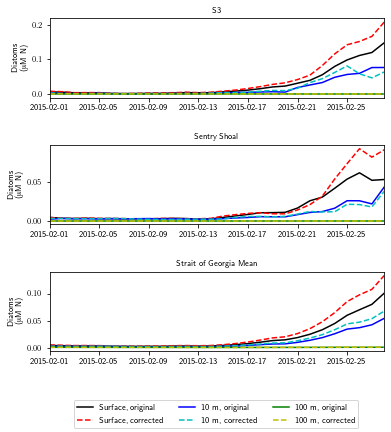

In [21]:
fig,ax=plt.subplots(3,1,figsize=(6,6))
fig.subplots_adjust(hspace=.6,bottom = 0.18,top=.95)
p1,=ax[0].plot(dates0,ts0['S3']['diatoms'][:,0],'k-',label='_nolegend_')
p2,=ax[0].plot(dates1,ts1['S3']['diatoms'][:,0],'r--',label='_nolegend_')
p3,=ax[0].plot(dates0,ts0['S3']['diatoms'][:,10],'b-',label='_nolegend_')
p4,=ax[0].plot(dates1,ts1['S3']['diatoms'][:,10],'c--',label='_nolegend_')
p5,=ax[0].plot(dates0,ts0['S3']['diatoms'][:,26],'g-',label='_nolegend_')
p6,=ax[0].plot(dates1,ts1['S3']['diatoms'][:,26],'y--',label='_nolegend_')
ax[0].set_title('S3')
ax[0].set_ylabel('Diatoms\n($\muup$M N)')
p1,=ax[1].plot(dates0,ts0['Sentry Shoal']['diatoms'][:,0],'k-',label='_nolegend_')
p2,=ax[1].plot(dates1,ts1['Sentry Shoal']['diatoms'][:,0],'r--',label='_nolegend_')
p3,=ax[1].plot(dates0,ts0['Sentry Shoal']['diatoms'][:,10],'b-',label='_nolegend_')
p4,=ax[1].plot(dates1,ts1['Sentry Shoal']['diatoms'][:,10],'c--',label='_nolegend_')
p5,=ax[1].plot(dates0,ts0['Sentry Shoal']['diatoms'][:,26],'g-',label='_nolegend_')
p6,=ax[1].plot(dates1,ts1['Sentry Shoal']['diatoms'][:,26],'y--',label='_nolegend_')
ax[1].set_title('Sentry Shoal')
ax[1].set_ylabel('Diatoms\n($\muup$M N)')
p1,=ax[2].plot(dates0,ts0['SOGMean']['diatoms'][:,0],'k-',label='Surface, original')
p2,=ax[2].plot(dates1,ts1['SOGMean']['diatoms'][:,0],'r--',label='Surface, corrected')
p3,=ax[2].plot(dates0,ts0['SOGMean']['diatoms'][:,10],'b-',label='10 m, original')
p4,=ax[2].plot(dates1,ts1['SOGMean']['diatoms'][:,10],'c--',label='10 m, corrected')
p5,=ax[2].plot(dates0,ts0['SOGMean']['diatoms'][:,26],'g-',label='100 m, original')
p6,=ax[2].plot(dates1,ts1['SOGMean']['diatoms'][:,26],'y--',label='100 m, corrected')
ax[2].set_title('Strait of Georgia Mean')
ax[2].set_ylabel('Diatoms\n($\muup$M N)')
fig.legend(loc=8,ncol=3,bbox_to_anchor=(.5, 0))
for iax in (ax[0],ax[1],ax[2]):
    iax.set_xlim((dt.datetime(2015,2,1),dt.datetime(2015,2,28)))
#fig.savefig('compFluxesCorrDIAT.eps',dpi=200)

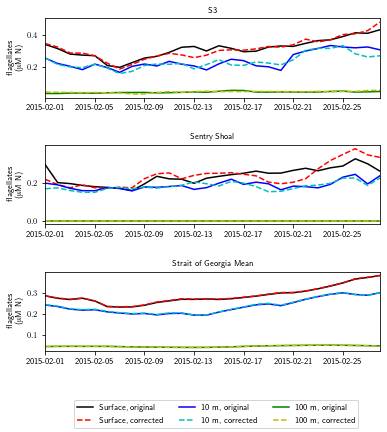

In [45]:
fig,ax=plt.subplots(3,1,figsize=(6,6))
fig.subplots_adjust(hspace=.6,bottom = 0.18,top=.95)
p1,=ax[0].plot(dates0,ts0['S3']['flagellates'][:,0],'k-',label='_nolegend_')
p2,=ax[0].plot(dates1,ts1['S3']['flagellates'][:,0],'r--',label='_nolegend_')
p3,=ax[0].plot(dates0,ts0['S3']['flagellates'][:,10],'b-',label='_nolegend_')
p4,=ax[0].plot(dates1,ts1['S3']['flagellates'][:,10],'c--',label='_nolegend_')
p5,=ax[0].plot(dates0,ts0['S3']['flagellates'][:,26],'g-',label='_nolegend_')
p6,=ax[0].plot(dates1,ts1['S3']['flagellates'][:,26],'y--',label='_nolegend_')
ax[0].set_title('S3')
ax[0].set_ylabel('flagellates\n($\muup$M N)')
p1,=ax[1].plot(dates0,ts0['Sentry Shoal']['flagellates'][:,0],'k-',label='_nolegend_')
p2,=ax[1].plot(dates1,ts1['Sentry Shoal']['flagellates'][:,0],'r--',label='_nolegend_')
p3,=ax[1].plot(dates0,ts0['Sentry Shoal']['flagellates'][:,10],'b-',label='_nolegend_')
p4,=ax[1].plot(dates1,ts1['Sentry Shoal']['flagellates'][:,10],'c--',label='_nolegend_')
p5,=ax[1].plot(dates0,ts0['Sentry Shoal']['flagellates'][:,26],'g-',label='_nolegend_')
p6,=ax[1].plot(dates1,ts1['Sentry Shoal']['flagellates'][:,26],'y--',label='_nolegend_')
ax[1].set_title('Sentry Shoal')
ax[1].set_ylabel('flagellates\n($\muup$M N)')
p1,=ax[2].plot(dates0,ts0['SOGMean']['flagellates'][:,0],'k-',label='Surface, original')
p2,=ax[2].plot(dates1,ts1['SOGMean']['flagellates'][:,0],'r--',label='Surface, corrected')
p3,=ax[2].plot(dates0,ts0['SOGMean']['flagellates'][:,10],'b-',label='10 m, original')
p4,=ax[2].plot(dates1,ts1['SOGMean']['flagellates'][:,10],'c--',label='10 m, corrected')
p5,=ax[2].plot(dates0,ts0['SOGMean']['flagellates'][:,26],'g-',label='100 m, original')
p6,=ax[2].plot(dates1,ts1['SOGMean']['flagellates'][:,26],'y--',label='100 m, corrected')
ax[2].set_title('Strait of Georgia Mean')
ax[2].set_ylabel('flagellates\n($\muup$M N)')
fig.legend(loc=8,ncol=3,bbox_to_anchor=(.5, 0))
for iax in (ax[0],ax[1],ax[2]):
    iax.set_xlim((dt.datetime(2015,2,1),dt.datetime(2015,2,28)))
#fig.savefig('compFluxesCorrDIAT.eps',dpi=200)

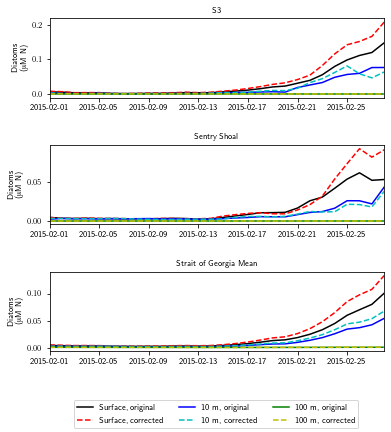

In [21]:
fig,ax=plt.subplots(3,1,figsize=(6,6))
fig.subplots_adjust(hspace=.6,bottom = 0.18,top=.95)
p1,=ax[0].plot(dates0,ts0['S3']['diatoms'][:,0],'k-',label='_nolegend_')
p2,=ax[0].plot(dates1,ts1['S3']['diatoms'][:,0],'r--',label='_nolegend_')
p3,=ax[0].plot(dates0,ts0['S3']['diatoms'][:,10],'b-',label='_nolegend_')
p4,=ax[0].plot(dates1,ts1['S3']['diatoms'][:,10],'c--',label='_nolegend_')
p5,=ax[0].plot(dates0,ts0['S3']['diatoms'][:,26],'g-',label='_nolegend_')
p6,=ax[0].plot(dates1,ts1['S3']['diatoms'][:,26],'y--',label='_nolegend_')
ax[0].set_title('S3')
ax[0].set_ylabel('Diatoms\n($\muup$M N)')
p1,=ax[1].plot(dates0,ts0['Sentry Shoal']['diatoms'][:,0],'k-',label='_nolegend_')
p2,=ax[1].plot(dates1,ts1['Sentry Shoal']['diatoms'][:,0],'r--',label='_nolegend_')
p3,=ax[1].plot(dates0,ts0['Sentry Shoal']['diatoms'][:,10],'b-',label='_nolegend_')
p4,=ax[1].plot(dates1,ts1['Sentry Shoal']['diatoms'][:,10],'c--',label='_nolegend_')
p5,=ax[1].plot(dates0,ts0['Sentry Shoal']['diatoms'][:,26],'g-',label='_nolegend_')
p6,=ax[1].plot(dates1,ts1['Sentry Shoal']['diatoms'][:,26],'y--',label='_nolegend_')
ax[1].set_title('Sentry Shoal')
ax[1].set_ylabel('Diatoms\n($\muup$M N)')
p1,=ax[2].plot(dates0,ts0['SOGMean']['diatoms'][:,0],'k-',label='Surface, original')
p2,=ax[2].plot(dates1,ts1['SOGMean']['diatoms'][:,0],'r--',label='Surface, corrected')
p3,=ax[2].plot(dates0,ts0['SOGMean']['diatoms'][:,10],'b-',label='10 m, original')
p4,=ax[2].plot(dates1,ts1['SOGMean']['diatoms'][:,10],'c--',label='10 m, corrected')
p5,=ax[2].plot(dates0,ts0['SOGMean']['diatoms'][:,26],'g-',label='100 m, original')
p6,=ax[2].plot(dates1,ts1['SOGMean']['diatoms'][:,26],'y--',label='100 m, corrected')
ax[2].set_title('Strait of Georgia Mean')
ax[2].set_ylabel('Diatoms\n($\muup$M N)')
fig.legend(loc=8,ncol=3,bbox_to_anchor=(.5, 0))
for iax in (ax[0],ax[1],ax[2]):
    iax.set_xlim((dt.datetime(2015,2,1),dt.datetime(2015,2,28)))
#fig.savefig('compFluxesCorrDIAT.eps',dpi=200)

Text(0.5, 1.0, 'Difference')

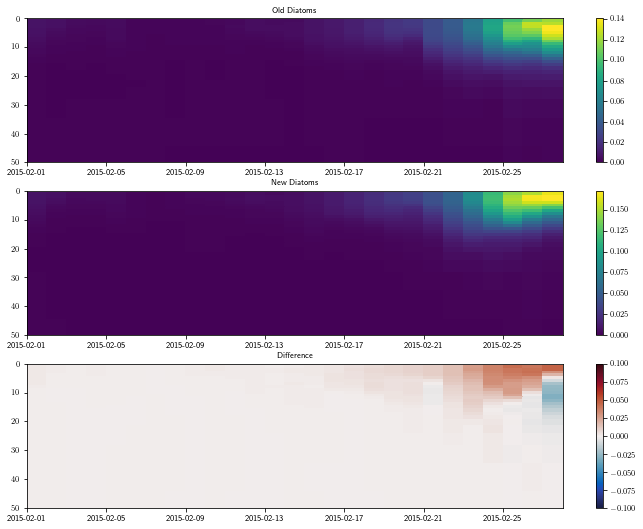

In [43]:
fig,ax=plt.subplots(3,1,figsize=(12,9))
m0=ax[0].pcolormesh(dates0,zs,ts0['S3']['diatoms'][:,:].T)
fig.colorbar(m0,ax=ax[0])
ax[0].set_ylim(50,0)
ax[0].set_title('Old Diatoms')
m1=ax[1].pcolormesh(dates1,zs,ts1['S3']['diatoms'][:,:].T)
fig.colorbar(m1,ax=ax[1])
ax[1].set_ylim(50,0)
ax[1].set_title('New Diatoms')
m2=ax[2].pcolormesh(dates1,zs,ts1['S3']['diatoms'][:,:].T-ts0['S3']['diatoms'][:,:].T,cmap=cmocean.cm.balance,
                vmin=-.1,vmax=.1)
ax[2].set_ylim(50,0)
fig.colorbar(m2,ax=ax[2])
ax[2].set_title('Difference')

Text(0.5, 1.0, 'Difference')

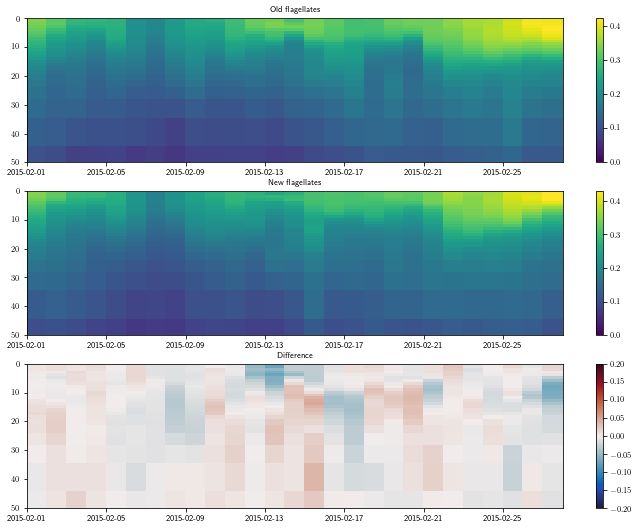

In [44]:
fig,ax=plt.subplots(3,1,figsize=(12,9))
m0=ax[0].pcolormesh(dates0,zs,ts0['S3']['flagellates'][:,:].T)
fig.colorbar(m0,ax=ax[0])
ax[0].set_ylim(50,0)
ax[0].set_title('Old flagellates')
m1=ax[1].pcolormesh(dates1,zs,ts1['S3']['flagellates'][:,:].T)
fig.colorbar(m1,ax=ax[1])
ax[1].set_ylim(50,0)
ax[1].set_title('New flagellates')
m2=ax[2].pcolormesh(dates1,zs,ts1['S3']['flagellates'][:,:].T-ts0['S3']['flagellates'][:,:].T,cmap=cmocean.cm.balance,
                vmin=-.2,vmax=.2)
ax[2].set_ylim(50,0)
fig.colorbar(m2,ax=ax[2])
ax[2].set_title('Difference')